In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

experiments_file_path = r'../output_data/PolicyExperimentsModelVars.csv'
experiments = pd.read_csv(experiments_file_path)
experiments




,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,...,TotalCostsOfSubsidies,EstimatedAverageDamagePerIncomeLabel,EstimatedAverageIncomeToDamageRatio,IncomeDistribution,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
0,0,0,0,1000,80,100yr,watts_strogatz,0,0,0.000000e+00,...,0,{'AverageDamagePerPoorHousehold': 17234.595331...,{'AverageIncomeToDamagePoorHousehold': 3.58385...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0,0,1,1000,80,100yr,watts_strogatz,0,63,0.000000e+00,...,0,{'AverageDamagePerPoorHousehold': 17234.595331...,{'AverageIncomeToDamagePoorHousehold': 3.58385...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0,0,2,1000,80,100yr,watts_strogatz,0,138,0.000000e+00,...,0,{'AverageDamagePerPoorHousehold': 16870.660809...,{'AverageIncomeToDamagePoorHousehold': 3.50817...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0,0,3,1000,80,100yr,watts_strogatz,0,192,0.000000e+00,...,0,{'AverageDamagePerPoorHousehold': 16361.275045...,{'AverageIncomeToDamagePoorHousehold': 3.40224...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0,0,4,1000,80,100yr,watts_strogatz,0,222,0.000000e+00,...,0,{'AverageDamagePerPoorHousehold': 16056.604336...,{'AverageIncomeToDamagePoorHousehold': 3.33889...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16761,399,99,33,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
16762,399,99,34,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
16763,399,99,35,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
16764,399,99,36,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


In [15]:
def unpack_dictionary(row, column_name):
    return pd.Series(row[column_name])

first_column_unpacked = experiments.apply(unpack_dictionary, args=('EstimatedAverageDamagePerIncomeLabel',), axis=1)
second_column_unpacked = experiments.apply(unpack_dictionary, args=('EstimatedAverageIncomeToDamageRatio',), axis=1)
policy_experiments_unpacked = pd.concat([experiments, first_column_unpacked, second_column_unpacked], axis=1)
experiments_clean = policy_experiments_unpacked.drop(['EstimatedAverageDamagePerIncomeLabel','EstimatedAverageIncomeToDamageRatio'], axis=1)
experiments_clean

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,...,TotalCostsOfSubsidies,IncomeDistribution,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold,0,0
0,0,0,0,1000,80,100yr,watts_strogatz,0,0,0.000000e+00,...,0,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 17234.595331...,{'AverageIncomeToDamagePoorHousehold': 3.58385...
1,0,0,1,1000,80,100yr,watts_strogatz,0,63,0.000000e+00,...,0,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 17234.595331...,{'AverageIncomeToDamagePoorHousehold': 3.58385...
2,0,0,2,1000,80,100yr,watts_strogatz,0,138,0.000000e+00,...,0,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 16870.660809...,{'AverageIncomeToDamagePoorHousehold': 3.50817...
3,0,0,3,1000,80,100yr,watts_strogatz,0,192,0.000000e+00,...,0,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 16361.275045...,{'AverageIncomeToDamagePoorHousehold': 3.40224...
4,0,0,4,1000,80,100yr,watts_strogatz,0,222,0.000000e+00,...,0,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 16056.604336...,{'AverageIncomeToDamagePoorHousehold': 3.33889...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16761,399,99,33,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...
16762,399,99,34,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...
16763,399,99,35,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...
16764,399,99,36,1000,80,100yr,watts_strogatz,3,291,0.000000e+00,...,1441893,Base,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,{'AverageDamagePerPoorHousehold': 7921.5332042...,{'AverageIncomeToDamagePoorHousehold': 1.59226...


In [12]:
intervals = [0, 20, 40, 60, 80]
custom_labels = ['0-20', '20-40', '40-60', '60-80']

#The results final dataframe only records the values of the variables when a flood occurred. 
results_between = experiments.copy()

#Therefore we cut out the steps where the flood has not yet occurred.
results_final = results_between[results_between['TotalActualDamage'] != 0]

# Create a new column representing the clusters
results_final['Cluster'] = pd.cut(results_final['Step'], bins=intervals, labels=custom_labels)
#Make separate dataframes for each experiment
package_1 = results_final[results_final['subsidies_package'] == 1]
package_2 = results_final[results_final['subsidies_package'] == 2]
package_3 = results_final[results_final['subsidies_package'] == 3]
no_subsidy = results_final[results_final['subsidies_package'] == 0]

#To check if it worked
package_1

/var/folders/n2/060btgx92fg7n1_kykfzg5880000gn/T/ipykernel_33182/2417960679.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_final['Cluster'] = pd.cut(results_final['Step'], bins=intervals, labels=custom_labels)


,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,...,EstimatedAverageDamagePerIncomeLabel,EstimatedAverageIncomeToDamageRatio,IncomeDistribution,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold,Cluster
85,1,0,49,1000,80,100yr,watts_strogatz,1,298,1.158965e+07,...,{'AverageDamagePerPoorHousehold': 11134.223823...,{'AverageIncomeToDamagePoorHousehold': 2.23870...,Base,10471.125488,9544.284323,28259.004136,2.105378,0.325590,0.310022,40-60
177,5,1,43,1000,80,100yr,watts_strogatz,1,249,1.714533e+07,...,{'AverageDamagePerPoorHousehold': 11874.894449...,{'AverageIncomeToDamagePoorHousehold': 2.37179...,Base,11097.523802,15782.815265,43280.238725,2.216534,0.535317,0.490557,40-60
322,9,2,6,1000,80,100yr,watts_strogatz,1,149,2.468422e+07,...,{'AverageDamagePerPoorHousehold': 11945.537374...,{'AverageIncomeToDamagePoorHousehold': 2.41303...,Base,11297.578086,23999.168660,56512.450796,2.282147,0.820673,0.659227,0-20
511,13,3,64,1000,80,100yr,watts_strogatz,1,292,1.470855e+07,...,{'AverageDamagePerPoorHousehold': 9867.7233490...,{'AverageIncomeToDamagePoorHousehold': 1.94481...,Base,9238.125621,12561.939617,42047.019806,1.820726,0.421051,0.487491,60-80
699,17,4,17,1000,80,100yr,watts_strogatz,1,162,2.256081e+07,...,{'AverageDamagePerPoorHousehold': 14440.316289...,{'AverageIncomeToDamagePoorHousehold': 2.78086...,Base,13476.747716,24024.985170,36659.098070,2.595300,0.809309,0.428622,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16098,381,95,65,1000,80,100yr,watts_strogatz,1,253,1.141430e+07,...,{'AverageDamagePerPoorHousehold': 12107.932800...,{'AverageIncomeToDamagePoorHousehold': 2.44049...,Base,11323.046691,9134.040217,25909.885682,2.282294,0.319041,0.301233,60-80
16211,385,96,23,1000,80,100yr,watts_strogatz,1,244,2.041834e+07,...,{'AverageDamagePerPoorHousehold': 8811.6797743...,{'AverageIncomeToDamagePoorHousehold': 1.73005...,Base,8060.307706,19597.848395,56321.611314,1.582537,0.654009,0.610201,20-40
16392,389,97,27,1000,80,100yr,watts_strogatz,1,193,2.236083e+07,...,{'AverageDamagePerPoorHousehold': 12769.317181...,{'AverageIncomeToDamagePoorHousehold': 2.52987...,Base,11576.603989,19622.040750,57494.533709,2.293571,0.664203,0.673060,20-40
16534,393,98,33,1000,80,100yr,watts_strogatz,1,297,1.759897e+07,...,{'AverageDamagePerPoorHousehold': 11135.851552...,{'AverageIncomeToDamagePoorHousehold': 2.18216...,Base,10234.267085,17645.526927,42501.280368,2.005490,0.614300,0.491231,20-40


<Axes: xlabel='Time', ylabel='No subsidy'>

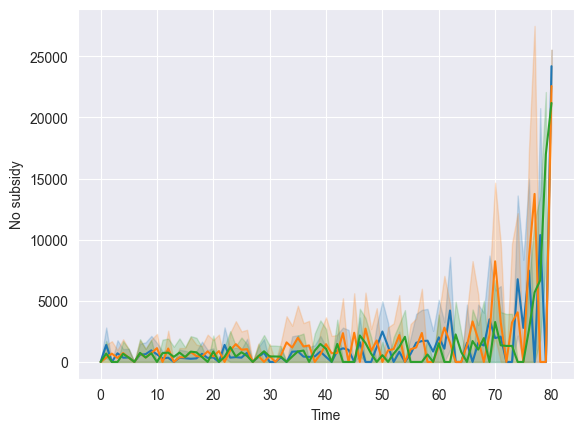

In [30]:
experiment_data = pd.DataFrame({
    'Time': experiments['Step'],
    'No subsidy': no_subsidy['Total'],
    'Package 1': package_1['EstimatedAverageDamagePerIncomeLabel'],
    'Package 2': package_2['AverageDamagePerPoorHousehold'],
    'Package 3': package_3['AverageDamagePerPoorHousehold']
})

sns.lineplot(x='Time', y='No subsidy', data=experiment_data )
sns.lineplot(x='Time', y='Package 1', data=experiment_data)
sns.lineplot(x='Time', y='Package 2', data=experiment_data)


,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,...,TotalAdaptationCosts,TotalCostsOfSubsidies,IncomeDistribution,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold,Cluster
1,0,0,1,1000,80,harvey,watts_strogatz,0,158,7.198383e+07,...,228750,0,Base,35482.144423,67107.017426,180261.912302,7.332050,2.315587,2.098275,0-20
10,1,0,8,1000,80,harvey,watts_strogatz,1,318,6.623255e+07,...,560274,375156,Base,32965.508328,67539.459982,151632.123820,6.471511,2.322952,1.839203,0-20
34,2,0,23,1000,80,harvey,watts_strogatz,2,436,5.988208e+07,...,5914379,5428401,Base,28023.451243,55792.965178,151586.063189,5.357675,1.897970,1.776748,20-40
108,3,0,73,1000,80,harvey,watts_strogatz,3,613,4.285977e+07,...,7080038,7822327,Base,22660.926587,40425.069344,104850.292134,4.469899,1.369085,1.183461,60-80
135,4,1,26,1000,80,harvey,watts_strogatz,0,604,5.058372e+07,...,2753815,0,Base,24977.956260,47752.675814,130816.144933,4.785980,1.595469,1.470495,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,395,98,47,1000,80,harvey,watts_strogatz,3,593,4.289436e+07,...,6692527,7250528,Base,22576.316782,41006.301437,104197.703463,4.401880,1.378681,1.221956,40-60
16360,396,99,46,1000,80,harvey,watts_strogatz,0,584,4.893233e+07,...,3955505,0,Base,24207.825378,50581.964339,90241.018996,4.769247,1.735555,1.030133,40-60
16413,397,99,52,1000,80,harvey,watts_strogatz,1,436,4.818246e+07,...,15867354,14930691,Base,30459.720989,42137.530218,120552.752069,6.289675,1.413800,1.336802,40-60
16437,398,99,23,1000,80,harvey,watts_strogatz,2,435,5.227291e+07,...,6155833,5817612,Base,29738.412730,55180.923861,95917.637692,5.750040,1.893195,1.100183,20-40


In [ ]:

# Assuming 'data' is your DataFrame with damage columns for each income class
# Replace this line with your actual DataFrame
data_experiments = pd.DataFrame({
    'Flood event': d2['Cluster'],
    'No subsidy': no_subsidy['AverageDamagePerPoorHousehold'],
    'Package 1': package_1['AverageDamagePerPoorHousehold'],
    'Package 2': package_2['AverageDamagePerPoorHousehold'], 
    'Package 3': package_3['AverageDamagePerPoorHousehold']
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments, id_vars=['Flood event'], var_name='Subsidy policy', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Subsidy policy'])

plt.title('Boxplot of average total damage (poor) per subsidy alternative')
plt.xlabel('Clustering of flood event (0-80 ticks)')
plt.ylabel('Average Total Damage')

output_path_experiments = r'../result_figures/Boxplot_Experiments.png'
plt.savefig(output_path_experiments)
plt.show()


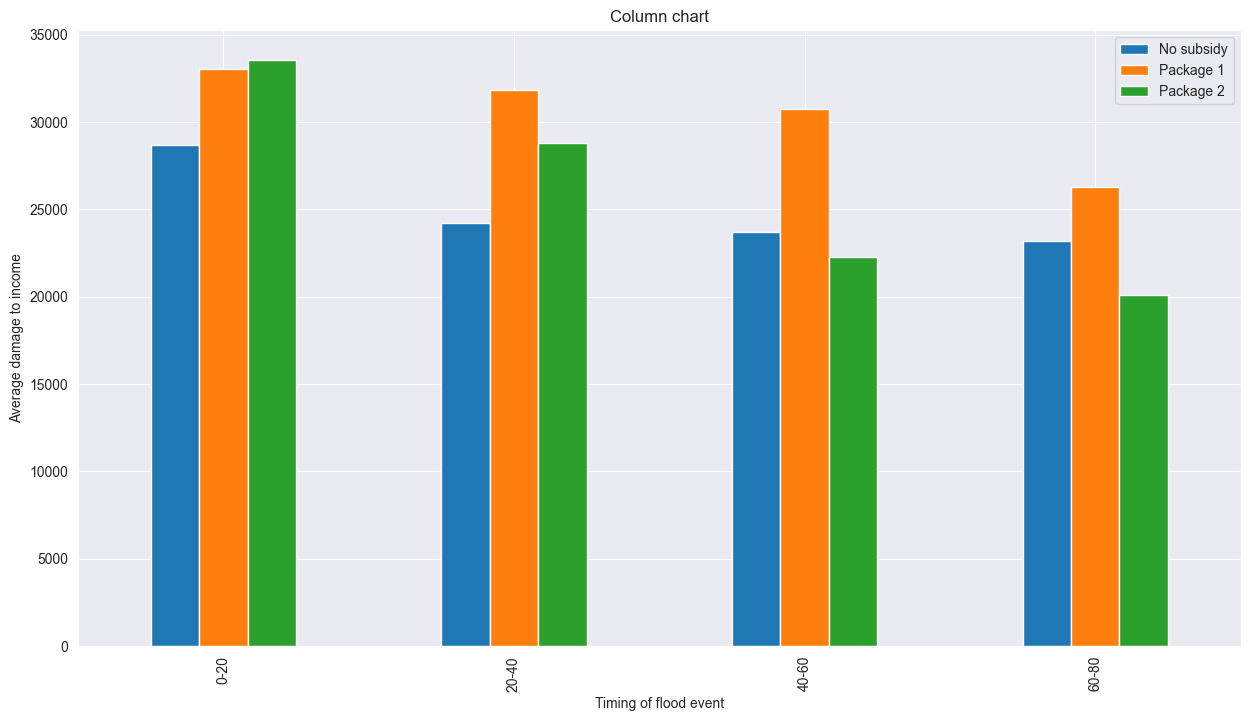

In [21]:
# Create the plotdata DataFrame - we have not used this, because afterwards we chose for boxplots. But it was a way to experiment with the data.
plotdata2 = pd.DataFrame({
    "No subsidy": no_subsidy.groupby('Cluster')['AverageDamagePerPoorHousehold'].mean(),
    "Package 1": package_1.groupby('Cluster')['AverageDamagePerPoorHousehold'].mean(),
    "Package 2": package_2.groupby('Cluster')['AverageDamagePerPoorHousehold'].mean()
})

# Display the result
plotdata2.plot(kind="bar", figsize=(15, 8))

plt.title("Column chart")
plt.xlabel("Timing of flood event")
plt.ylabel("Average damage to income")

plt.show()